<a href="https://colab.research.google.com/github/EmmanuelADAM/IntelligenceArtificiellePython/blob/master/GymBlackJackDoubleQLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning
## Appliqué à [Gym.OpenAI](https://gym.openai.com)

---
## Test de ML par Q-Learning pour jouer au Black Jack

**Utilisation de l'environnement gymnasium**
 (voir la page d'introduction à [gymnasium](https://www.gymlibrary.dev/)).

#### Si besoin, installer gymnasium

In [2]:
#!pip install gymnasium 

----
#### L'environnement Taxi

In [3]:
import gymnasium as gym

---
- Utiliser l'environnement `Blackjack`. Un jeu de carte où l'objectif est de cumuler les points des cartes pour se rapprocher au plus de la valeur 21, *sans la dépasser*.
 - un donneur tire une carte
 - le joueur peut décider : 
   - de la prendre (*hit*)
       - si la somme dépasse 21, la partie est perdue
   - d'arrêter (*stick*)
 - les valeurs des cartes sont : 
   - 11 points pour un As si la somme ne dépasse pas 21, 1 point sinon
   - 10 points pour chaque figure (Valet, Dame, Roi)
   - pour les cartes de 2 à 10, la valeur est la valeur de la carte.

Il s'agit donc d'entraîner l'«ia», en fait l'algorithme de Q-Learning pour apprendre à prendre les meilleurs décisions en fonction des tirages pour maximiser les gains et éviter les échecs.

- les actions sont :
  - 0: arrêt (*stick*), 1: prendre (*hit*)

- les récompenses sont : 
    - gain (black jack naturel (as puis 10 = 21)) : 1,5 point
    - gain (somme joueur = 21 ou somme joueur > somme donneur en fin de partie) : 1 point
    - échec (somme joueur > 21 ou somme joueur < somme donneur en fin de partie) : -1 point
    - autres cas : 0 point

---
#### Etude de l'environnement

In [9]:
env = gym.make('Blackjack-v1', natural=False, sab=False, render_mode='rgb_array')
#env = gym.make('Blackjack-v1', natural=False, sab=False, render_mode='human')

print("specification de l'environnement : ")
print("espace d'actions : ", env.action_space ) #ici 2 actions discrétisée
print("espace d'etats : ", env.observation_space) 
print("\t- somme des points joueurs borné par 32")
print("\t- valeur de la carte visible du donneur bornée par 11 points")
print("\t- potentiel as du joeur utilise en 11 ou non")
actions = ("stopper", "prendre")
s = env.reset()
#sur colab, on effectue pas de render, on affichera la carte retournée et la somme
#sur un environnement local (jupyterlab, spyder, thonny, ....) on pourra bénéficier 
# d'un affichage graphique
#env.render()
print()
print("********l'etat initial change à chaque reset***** ici s= ",s)
somme = s[0][0]
carte_tiree = s[0][1]
as_utilise_comme_11 = s[0][2]
print(f"--> cela correspond à une somme initiale = {somme}, la carte du donneur lui rapporte {carte_tiree} points, un as a été utilisé comme 11 = {as_utilise_comme_11}")


specification de l'environnement : 
espace d'actions :  Discrete(2)
espace d'etats :  Tuple(Discrete(32), Discrete(11), Discrete(2))
	- somme des points joueurs borné par 32
	- valeur de la carte visible du donneur bornée par 11 points
	- potentiel as du joeur utilise en 11 ou non

********l'etat initial change à chaque reset***** ici s=  ((18, 10, False), {})
--> cela correspond à une somme initiale = 18, la carte du donneur lui rapporte 10 points, un as a été utilisé comme 11 = False


---
### Test des actions

**Etat d'un jeu de black jack** est le suivant : 
- initialement, 
  - le donneur tire 2 cartes pour lui, 1 seule est visible
  - le joueur reçoit 2 cartes faces visibles
- à chaque coup (`step`), le joueur peut demander une carte ou arrêter
  - s'il demande une carte, chaque nouvelle carte apparaît face visible
  - s'il arrête, le donneur joue et tire entre 0 et n cartes pour s'approcher de 21 en dépassant le joueur


Sous Gym, `step` permet donc d'effectuer une action. 
En retour la fonction retourne une observation sur l'état d'arrivée, sa récompense, son type (final ou non), et des informations.

Avec la librairie gym, step retourne : 
  - observation = (somme des points joueur, carte visible donneur, as utilise pour 11 points),
  - reward = récompense,
  - done = vrai si état final atteint,
  - truncated = vrai si état feuille non final (pas utilisé ici),
  - info = probabilité de succès de l'action (pas utilisé ici).


In [27]:
s = env.reset()
#sur colab, on effectue pas de render, on affichera la carte retournée et la somme
#sur un environnement local (jupyterlab, spyder, thonny, ....) on pourra bénéficier 
# d'un affichage graphique
#env.render()

print("********Nouveau tirage********")
somme = s[0][0]
carte_tiree = s[0][1]
as_utilise_comme_11 = s[0][2]
print(f"--> Avec vos 2 cartes, vous avez {somme} points, la carte visible du donneur lui rapporte {carte_tiree} points, as utilise comme 11 = {as_utilise_comme_11}")

fin = False
while not fin:
    print("Choisir une action.. ")
    a = int(input("Arrêter (0) ou prendre une nouvelle carte (1) : "))
    print("action choisie=",actions[a],"; l'exécuter...")
    #on recupère des valeurs en retour
    new_s, reward, done, truncated, info = env.step(a)
    somme = new_s[0]
    carte_tiree = new_s[1]
    as_utilise_comme_11 = new_s[2]
    print(new_s)
    print(f"--> nouvelle somme = {somme}, as utilise comme 11 = {as_utilise_comme_11}")
    env.render()
    fin = done 

print(f"--> cartes tirees par le donneur = {env.dealer}")
print(f"recompense en fin de jeu={reward}, etat final (but)={done}, etat feuille={truncated}, info={info}")

********Nouveau tirage********
--> Avec vos 2 cartes, vous avez 11 points, la carte visible du donneur lui rapporte 1 points, as utilise comme 11 = False
Choisir une action.. 


Arrêter (0) ou prendre une nouvelle carte (1) :  1


action choisie= prendre ; l'exécuter...
(20, 1, False)
--> nouvelle somme = 20, as utilise comme 11 = False
Choisir une action.. 


Arrêter (0) ou prendre une nouvelle carte (1) :  0


action choisie= stopper ; l'exécuter...
(20, 1, False)
--> nouvelle somme = 20, as utilise comme 11 = False
--> cartes tirees par le donneur = [1, 6]
recompense en fin de jeu=1.0, etat final (but)=True, etat feuille=False, info={}


---
### <font color="red">Résolution</font>


***Basez vous sur les exemples vus en TDs pour implémenter le Q-Learning, et le Double-Q-Learning***

#### Matrice Q ?
Comment définir la matrice Q ?
  - en fonction de la somme des points des cartes jouées, il faut décider de poursuivre ou non
  - on ne doit pas dépasser 21 points
  - on pourrait définir une matrice de 21 lignes et 2 colonnes (prendre ou non)
  
Affinage ? 
  - on peut décider de poursuivre ou non en fonction des cartes reçues (il est moins fréquent de tirer une figure qu'une carte basse), ou en fonction de la carte du donneur...
  - la matrice Q serait alors augmentée

-----
***Basez vous sur les exemples vus en TDs pour dessiner la courbe d'évolution des scores pour le Q-Learning, et le Double-Q-Learning***

In [1]:
import matplotlib.pyplot as plt
def plot_frequence_sol(solutions_list):
    """
    dessine la frequence de solution trouvees
    Parameters
    ----------
    solutions : liste des solutions

    Returns
    -------
    None.

    """
    xs = [x[0] for x in solutions_list]
    ys = [y[1] for y in solutions_list]
    plt.figure(figsize=(10, 4))
    plt.plot(xs, ys, '.')
    plt.show()



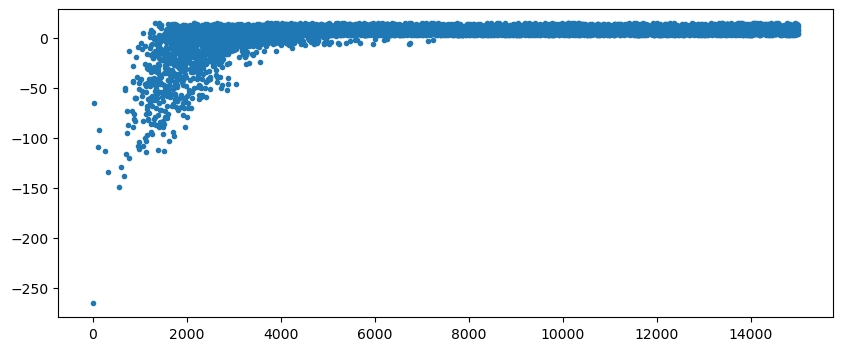

In [14]:
plot_frequence_sol(solutions)

np.round(QA, 3)

Plus on relance les tests, plus on a de chance de trouver une solution peu coûteuse apparaît...